In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as plot
import math

In [2]:
observable_df = pd.read_csv('observable_full.csv')
observable_df

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,...,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l,physical
0,11778,24.4559,21.2513,18.8165,17.1871,16.1598,17.3743,14.8193,13.8647,13.1298,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.142799,True
1,11779,26.0896,22.8653,20.4177,18.7772,17.7395,18.9609,16.3787,15.4099,14.6630,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.283535,True
2,11780,27.0969,23.8540,21.3933,19.7427,18.6937,19.9219,17.3139,16.3305,15.5716,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.422245,True
3,11781,27.8444,24.5863,22.1115,20.4527,19.3919,20.6274,17.9932,16.9954,16.2240,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.558968,True
4,11782,28.4497,25.1780,22.6875,21.0227,19.9497,21.1922,18.5324,17.5203,16.7361,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.693734,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299775,1012817,19.4627,17.5401,16.2592,15.4677,14.9378,15.6757,14.2977,13.7890,13.3400,...,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.142799,True
299776,1012818,21.0540,19.1060,17.8141,17.0149,16.4871,17.2263,15.8320,15.3213,14.8597,...,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.283535,True
299777,1012819,22.0174,20.0473,18.7439,17.9375,17.4130,18.1522,16.7421,16.2287,15.7571,...,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.422245,True
299778,1012820,22.7193,20.7326,19.4171,18.6058,18.0817,18.8222,17.3960,16.8793,16.3961,...,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.558968,True


In [3]:
limiting_mags = {
    'LSST_u': 24.2,
    'LSST_g': 24.5,
    'LSST_r': 23.9,
    'LSST_i': 23.6,
    'LSST_z': 23.4,
    'VIS': 24.5,
    'NISP_Y': 23.0,
    'NISP_J': 23.0,
    'NISP_H': 23.0
}

In [4]:
condmax = (observable_df['VIS'] < limiting_mags['VIS'])
observable_df = observable_df[condmax]

In [5]:
condmin = (observable_df['VIS'] > 15)
observable_df = observable_df[condmin]

In [6]:
observable_df

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,...,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l,physical
0,11778,24.4559,21.2513,18.8165,17.1871,16.1598,17.3743,14.8193,13.8647,13.1298,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.142799,True
1,11779,26.0896,22.8653,20.4177,18.7772,17.7395,18.9609,16.3787,15.4099,14.6630,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.283535,True
2,11780,27.0969,23.8540,21.3933,19.7427,18.6937,19.9219,17.3139,16.3305,15.5716,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.422245,True
3,11781,27.8444,24.5863,22.1115,20.4527,19.3919,20.6274,17.9932,16.9954,16.2240,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.558968,True
4,11782,28.4497,25.1780,22.6875,21.0227,19.9497,21.1922,18.5324,17.5203,16.7361,...,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.693734,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299775,1012817,19.4627,17.5401,16.2592,15.4677,14.9378,15.6757,14.2977,13.7890,13.3400,...,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.142799,True
299776,1012818,21.0540,19.1060,17.8141,17.0149,16.4871,17.2263,15.8320,15.3213,14.8597,...,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.283535,True
299777,1012819,22.0174,20.0473,18.7439,17.9375,17.4130,18.1522,16.7421,16.2287,15.7571,...,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.422245,True
299778,1012820,22.7193,20.7326,19.4171,18.6058,18.0817,18.8222,17.3960,16.8793,16.3961,...,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.558968,True


<Figure size 640x480 with 0 Axes>

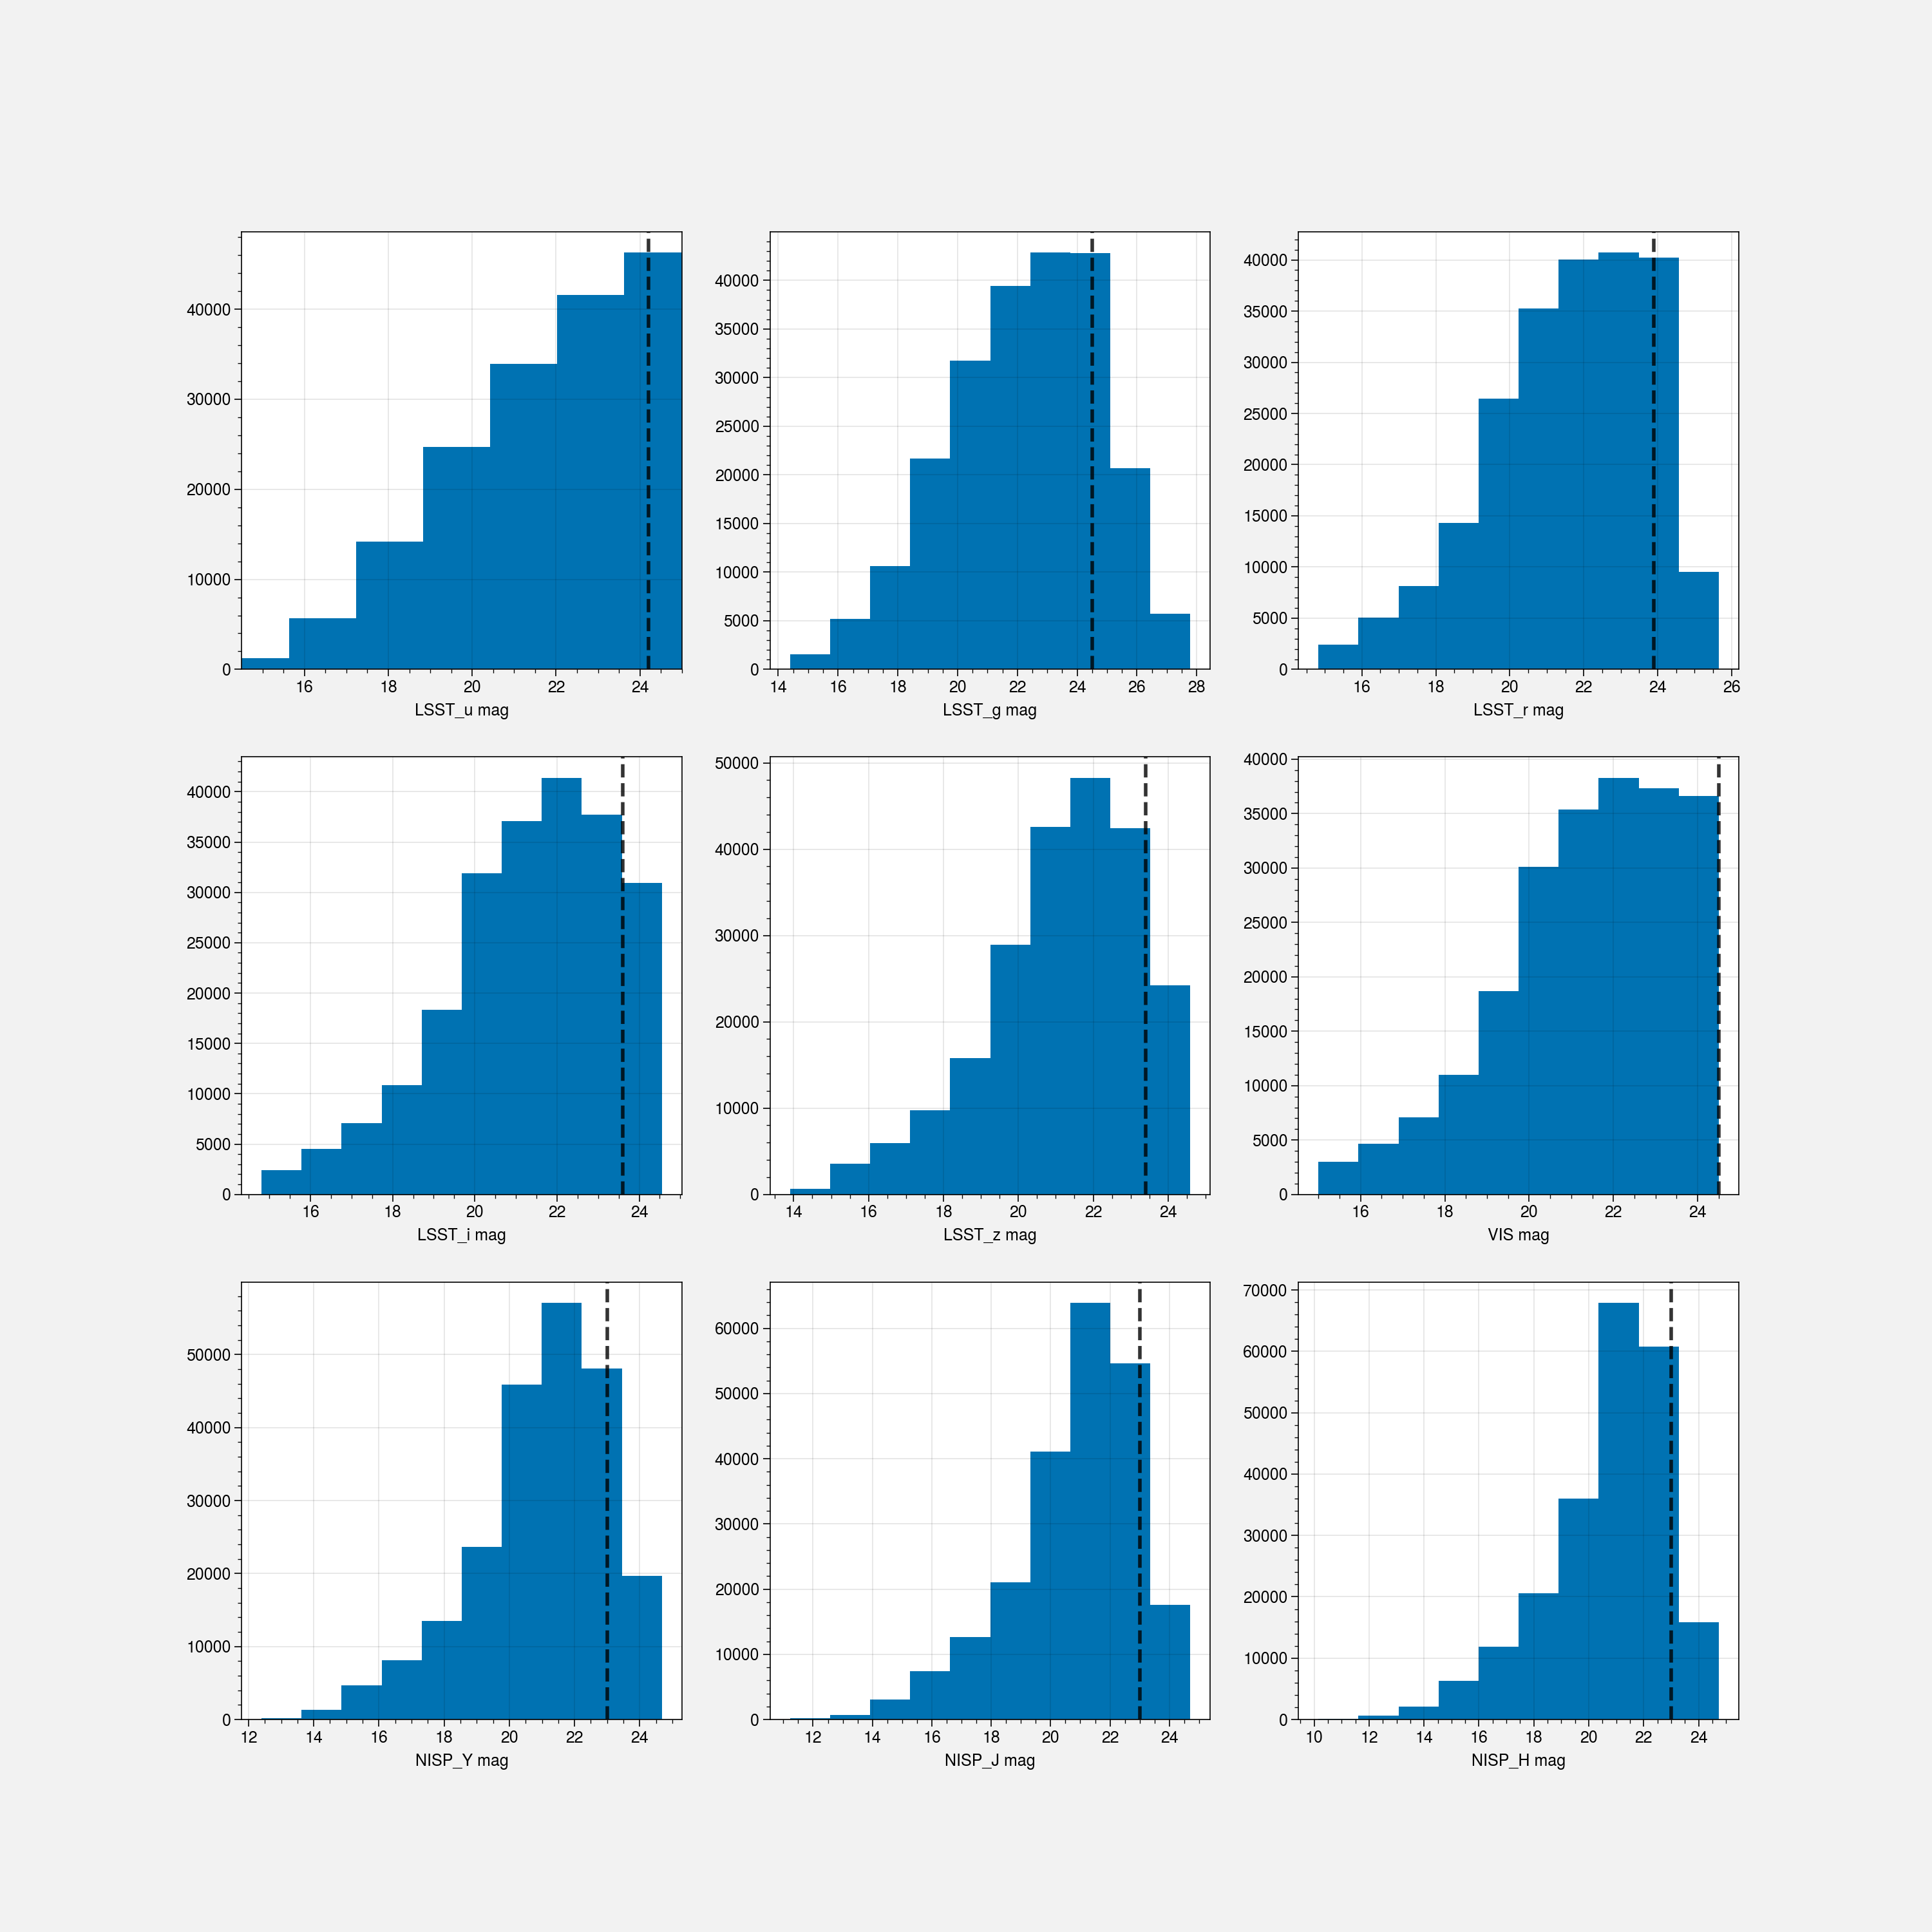

In [7]:
plt.clf()
plt.figure(figsize=(15,15))
plt.subplot(331)
plt.hist(observable_df['LSST_u'])
plt.xlabel('LSST_u mag')
plt.axvline(x=limiting_mags.get('LSST_u'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlim([14.5, 25])

plt.subplot(332)
plt.hist(observable_df['LSST_g'])
plt.axvline(x=limiting_mags.get('LSST_g'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('LSST_g mag')

plt.subplot(333)
plt.hist(observable_df['LSST_r'])
plt.axvline(x=limiting_mags.get('LSST_r'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('LSST_r mag')

plt.subplot(334)
plt.hist(observable_df['LSST_i'])
plt.axvline(x=limiting_mags.get('LSST_i'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('LSST_i mag')

plt.subplot(335)
plt.hist(observable_df['LSST_z'])
plt.axvline(x=limiting_mags.get('LSST_z'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('LSST_z mag')

plt.subplot(336)
plt.hist(observable_df['VIS'])
plt.axvline(x=limiting_mags.get('VIS'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('VIS mag')

plt.subplot(337)
plt.hist(observable_df['NISP_Y'])
plt.axvline(x=limiting_mags.get('NISP_Y'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('NISP_Y mag')

plt.subplot(338)
plt.hist(observable_df['NISP_J'])
plt.axvline(x=limiting_mags.get('NISP_J'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('NISP_J mag')

plt.subplot(339)
plt.hist(observable_df['NISP_H'])
plt.axvline(x=limiting_mags.get('NISP_H'),color='black',linestyle='--',linewidth=2, alpha=0.8)
plt.xlabel('NISP_H mag')

plt.show()
#plt.savefig('mags_hist.png', format='png', dpi=250)

## Applying photometric errors (but hopefully correctly this time)

We should reach a S/N = 10 as a limit. Signal and noise are referred to in fluxes, however, so I'll have to convert the magnitudes into fluxes. But this is beneficial! Here's how Micol explained it:

This is also useful because in reality the Gaussian distribution of errors is expected on fluxes, not on their logarithm. So, you will have $f_{lim}$ derived from $m_{lim}$, and you know that $f_{lim}/\Delta f = 10$, from which you obtain $\Delta f$. This is the number you can use as sigma for your Gaussian distribution of noise to be applied on fluxes. So, if `f` is the flux you have from the model SEDs, you obtain `fobs=f+np.random.normal(0,Δf)`. Then you have to convert back fluxes and errors in magnitudes.


## Converting from Magnitudes to Flux ($\mu$Jy)

$$m_{AB} = -2.5 \log_{10}f + 23.9$$

$$f = 10^{-0.4(m_{AB} -23.9)}$$



$$\frac{f}{\Delta f} = 10$$ 
$$\Delta f_{lim} = \frac{f_{lim}}{10} = S/N$$

$$f_{obs} = f + \frac{1}{\Delta f \sqrt{2 \pi}} exp \frac{f^2}{2 \Delta f^2}$$

$$m_{obs} = -2.5 \log_{10}f_{obs} + 23.9$$

$$\Delta m = \frac{2.5}{\ln(10) \frac{\Delta f }{f}} $$

In [8]:
def AB_to_flux(AB):
    f=np.ones(len(AB))
    f = pow(10.0, -0.4*(np.asarray(AB) - 23.9))
    return f

In [9]:
def flux_to_AB(flux):
#     m=np.ones(len(flux))*99.0
#     i=np.where(flux>0.0) 
#     m[i]=-2.5*np.log10(flux[i])+23.9
    m=-2.5*np.log10(flux)+23.9
    np.nan_to_num(m,copy=False,nan=99.0,posinf=None,neginf=None)
    return m

In [10]:
limiting_fluxes = limiting_mags.copy()

In [11]:
for i in limiting_fluxes.keys():
    limiting_fluxes[i] = 10**(-0.4*(limiting_mags[i] - 23.9))

In [12]:
limiting_fluxes

{'LSST_u': 0.7585775750291832,
 'LSST_g': 0.5754399373371561,
 'LSST_r': 1.0,
 'LSST_i': 1.3182567385564037,
 'LSST_z': 1.5848931924611136,
 'VIS': 0.5754399373371561,
 'NISP_Y': 2.29086765276777,
 'NISP_J': 2.29086765276777,
 'NISP_H': 2.29086765276777}

In [13]:
lim_flux_err = limiting_fluxes.copy()

In [14]:
SN = 10

In [15]:
for i in lim_flux_err.keys():
    lim_flux_err[i] = lim_flux_err[i]/SN

In [16]:
lim_flux_err

{'LSST_u': 0.07585775750291832,
 'LSST_g': 0.05754399373371562,
 'LSST_r': 0.1,
 'LSST_i': 0.13182567385564037,
 'LSST_z': 0.15848931924611137,
 'VIS': 0.05754399373371562,
 'NISP_Y': 0.22908676527677702,
 'NISP_J': 0.22908676527677702,
 'NISP_H': 0.22908676527677702}

In [33]:
lim_mag_err = lim_flux_err.copy()
for i in lim_flux_err.keys():
    lim_mag_err[i] = (2.5/math.log(10.))*np.abs(lim_flux_err[i]/limiting_fluxes[i])

In [18]:
lim_mag_err

{'LSST_u': 0.10857362047581293,
 'LSST_g': 0.10857362047581294,
 'LSST_r': 0.10857362047581294,
 'LSST_i': 0.10857362047581294,
 'LSST_z': 0.10857362047581294,
 'VIS': 0.10857362047581294,
 'NISP_Y': 0.10857362047581294,
 'NISP_J': 0.10857362047581294,
 'NISP_H': 0.10857362047581294}

In [34]:
phot_errors_df = observable_df.copy()

In [35]:
np.random.seed(seed = 45)

In [36]:
def addFluxColumns(table):
    row_number = table["VIS"].size
    for name in lim_flux_err.keys():
        col_data = AB_to_flux(table[name])
        col_name = 'FLUX_'+name
        table[col_name]=col_data
    return table

In [37]:
def addErrorColumns(table):
    row_number = table["VIS"].size
    for name in lim_flux_err.keys():
        col_data = np.ones(row_number)*lim_flux_err.get(name)
        col_name = 'FLUX_'+name+'_ERR'
        table[col_name]=col_data
    return table

In [38]:
def randomizeFlux(table):
    row_number = table['VIS'].size
    for name in lim_flux_err.keys():
        s = np.random.normal(0,table['FLUX_'+name+'_ERR'],row_number)
        table['FLUX_'+name+'_OBS']=table['FLUX_'+name]+s
    return table

In [39]:
def addObsMagnitudes(table):
    for name in lim_flux_err.keys():
        flux_obs=table['FLUX_'+name+'_OBS']
        mag_obs = flux_to_AB(flux_obs)
        dmag = (2.5/math.log(10.))*np.abs(table['FLUX_'+name+'_ERR']/table['FLUX_'+name])
        table[name+'_OBS'] = mag_obs
        table['delta_'+ name] = dmag
        table.loc[table[name]>90., ('delta_'+ name)] = 99.
    return table

In [40]:
table_with_flux = addFluxColumns(phot_errors_df)
table_with_error = addErrorColumns(phot_errors_df)
del phot_errors_df
randomized_table = randomizeFlux(table_with_error)
del table_with_error
phot_errors_df = addObsMagnitudes(randomized_table)

/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home

In [195]:
observable_df

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,z,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l,physical
0,11778,24.4559,21.2513,18.8165,17.1871,16.1598,17.3743,14.8193,13.8647,13.1298,0.01,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.142799,True
1,11779,26.0896,22.8653,20.4177,18.7772,17.7395,18.9609,16.3787,15.4099,14.6630,0.02,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.283535,True
2,11780,27.0969,23.8540,21.3933,19.7427,18.6937,19.9219,17.3139,16.3305,15.5716,0.03,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.422245,True
3,11781,27.8444,24.5863,22.1115,20.4527,19.3919,20.6274,17.9932,16.9954,16.2240,0.04,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.558968,True
4,11782,28.4497,25.1780,22.6875,21.0227,19.9497,21.1922,18.5324,17.5203,16.7361,0.05,0.001,0.9845,1.000000e+10,0.0,1.0,0.1,1.0,2.0,0.693734,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299775,1012817,19.4627,17.5401,16.2592,15.4677,14.9378,15.6757,14.2977,13.7890,13.3400,0.01,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.142799,True
299776,1012818,21.0540,19.1060,17.8141,17.0149,16.4871,17.2263,15.8320,15.3213,14.8597,0.02,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.283535,True
299777,1012819,22.0174,20.0473,18.7439,17.9375,17.4130,18.1522,16.7421,16.2287,15.7571,0.03,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.422245,True
299778,1012820,22.7193,20.7326,19.4171,18.6058,18.0817,18.8222,17.3960,16.8793,16.3961,0.04,13.000,0.5484,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,0.558968,True


In [41]:
phot_errors_df

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,...,LSST_z_OBS,delta_LSST_z,VIS_OBS,delta_VIS,NISP_Y_OBS,delta_NISP_Y,NISP_J_OBS,delta_NISP_J,NISP_H_OBS,delta_NISP_H
0,11778,24.4559,21.2513,18.8165,17.1871,16.1598,17.3743,14.8193,13.8647,13.1298,...,16.159888,0.000138,17.374451,0.000153,14.819340,0.000058,13.864708,0.000024,13.129816,0.000012
1,11779,26.0896,22.8653,20.4177,18.7772,17.7395,18.9609,16.3787,15.4099,14.6630,...,17.739038,0.000591,18.960999,0.000661,16.378671,0.000244,15.409986,0.000100,14.663026,0.000050
2,11780,27.0969,23.8540,21.3933,19.7427,18.6937,19.9219,17.3139,16.3305,15.5716,...,18.694331,0.001423,19.922022,0.001601,17.314541,0.000577,16.330561,0.000233,15.571375,0.000116
3,11781,27.8444,24.5863,22.1115,20.4527,19.3919,20.6274,17.9932,16.9954,16.2240,...,19.389771,0.002707,20.630064,0.003067,17.995985,0.001079,16.995146,0.000430,16.223459,0.000212
4,11782,28.4497,25.1780,22.6875,21.0227,19.9497,21.1922,18.5324,17.5203,16.7361,...,19.958568,0.004525,21.192841,0.005159,18.533205,0.001773,17.519734,0.000698,16.736025,0.000339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299775,1012817,19.4627,17.5401,16.2592,15.4677,14.9378,15.6757,14.2977,13.7890,13.3400,...,14.937752,0.000045,15.675699,0.000032,14.297693,0.000036,13.788981,0.000022,13.339983,0.000015
299776,1012818,21.0540,19.1060,17.8141,17.0149,16.4871,17.2263,15.8320,15.3213,14.8597,...,16.486939,0.000186,17.226648,0.000134,15.831843,0.000147,15.321216,0.000092,14.859719,0.000060
299777,1012819,22.0174,20.0473,18.7439,17.9375,17.4130,18.1522,16.7421,16.2287,15.7571,...,17.413024,0.000437,18.152905,0.000314,16.742124,0.000341,16.228663,0.000212,15.756836,0.000138
299778,1012820,22.7193,20.7326,19.4171,18.6058,18.0817,18.8222,17.3960,16.8793,16.3961,...,18.080017,0.000810,18.821704,0.000582,17.396087,0.000622,16.879447,0.000387,16.395915,0.000248


In [184]:
# -----------

In [185]:
# old cell
#for name in lim_flux_err.keys():
#    mag = phot_errors_df[name]
#    flux = AB_to_flux(mag)
#    noise = np.random.normal(0, lim_flux_err[name])
#    flux_obs = flux + noise
#    flux_err = lim_flux_err[name]
#    mag_obs = flux_to_AB(flux_obs)
#    dmag = (2.5/np.log(10.))*np.abs(flux_err/flux)
#    phot_errors_df[name] = mag_obs
#    phot_errors_df['delta_'+ name] = dmag

## Errors visualised

<Figure size 640x480 with 0 Axes>

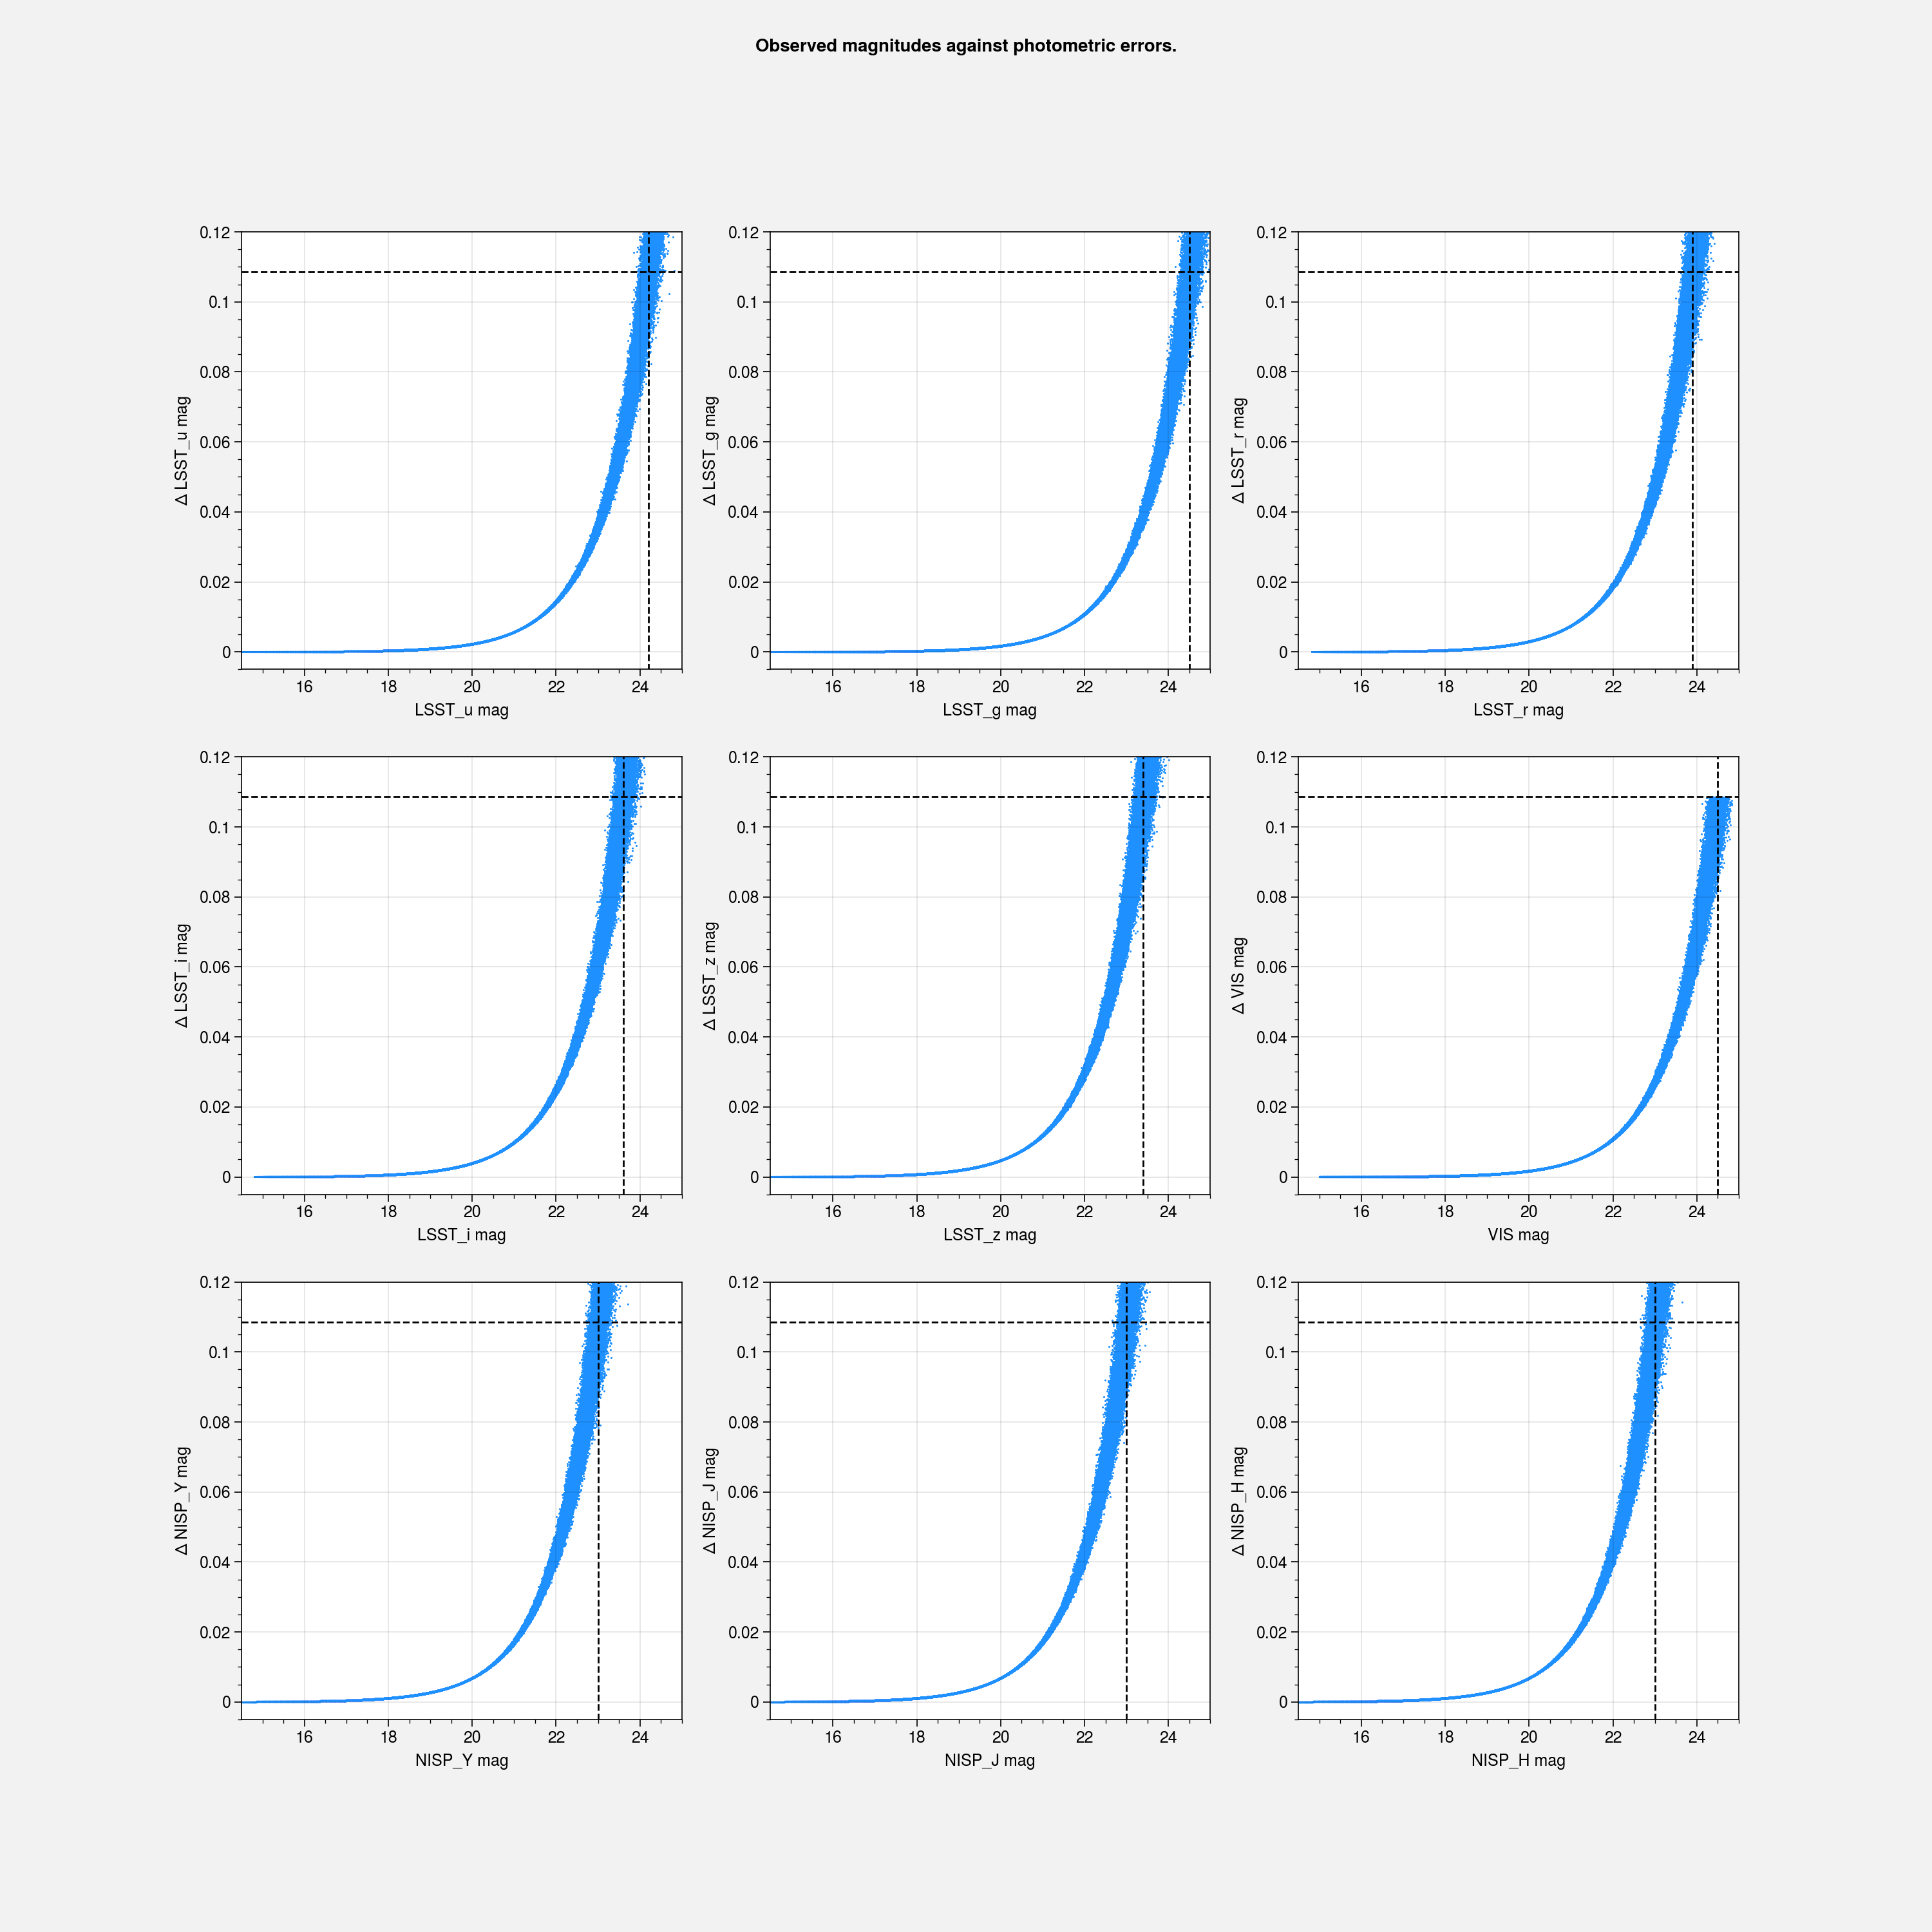

In [42]:
plt.clf()
plt.figure(figsize=(15,15))
plt.suptitle('Observed magnitudes against photometric errors.')
plt.subplot(331)
plt.scatter(phot_errors_df['LSST_u_OBS'], phot_errors_df['delta_LSST_u'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_u'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
#plt.xlim([23.5, 25])
#plt.ylim([0.05, 0.12])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_u mag')
plt.ylabel(r'$\Delta$ LSST_u mag')

plt.subplot(332)
plt.scatter(phot_errors_df['LSST_g_OBS'], phot_errors_df['delta_LSST_g'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_g'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_g mag')
plt.ylabel(r'$\Delta$ LSST_g mag')

plt.subplot(333)
plt.scatter(phot_errors_df['LSST_r_OBS'], phot_errors_df['delta_LSST_r'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_r'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_r mag')
plt.ylabel(r'$\Delta$ LSST_r mag')

plt.subplot(334)
plt.scatter(phot_errors_df['LSST_i_OBS'], phot_errors_df['delta_LSST_i'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_i'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_i mag')
plt.ylabel(r'$\Delta$ LSST_i mag')

plt.subplot(335)
plt.scatter(phot_errors_df['LSST_z_OBS'], phot_errors_df['delta_LSST_z'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_z'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_z mag')
plt.ylabel(r'$\Delta$ LSST_z mag')

plt.subplot(336)
plt.scatter(phot_errors_df['VIS_OBS'], phot_errors_df['delta_VIS'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['VIS'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('VIS mag')
plt.ylabel(r'$\Delta$ VIS mag')

plt.subplot(337)
plt.scatter(phot_errors_df['NISP_Y_OBS'], phot_errors_df['delta_NISP_Y'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_Y'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_Y mag')
plt.ylabel(r'$\Delta$ NISP_Y mag')

plt.subplot(338)
plt.scatter(phot_errors_df['NISP_J_OBS'], phot_errors_df['delta_NISP_J'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_J'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_J mag')
plt.ylabel(r'$\Delta$ NISP_J mag')

plt.subplot(339)
plt.scatter(phot_errors_df['NISP_H_OBS'], phot_errors_df['delta_NISP_H'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_H'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_H mag')
plt.ylabel(r'$\Delta$ NISP_H mag')
plt.show()
#plt.savefig('observed_mags_v_delmags.png', format='png', dpi=250, facecolor='w')

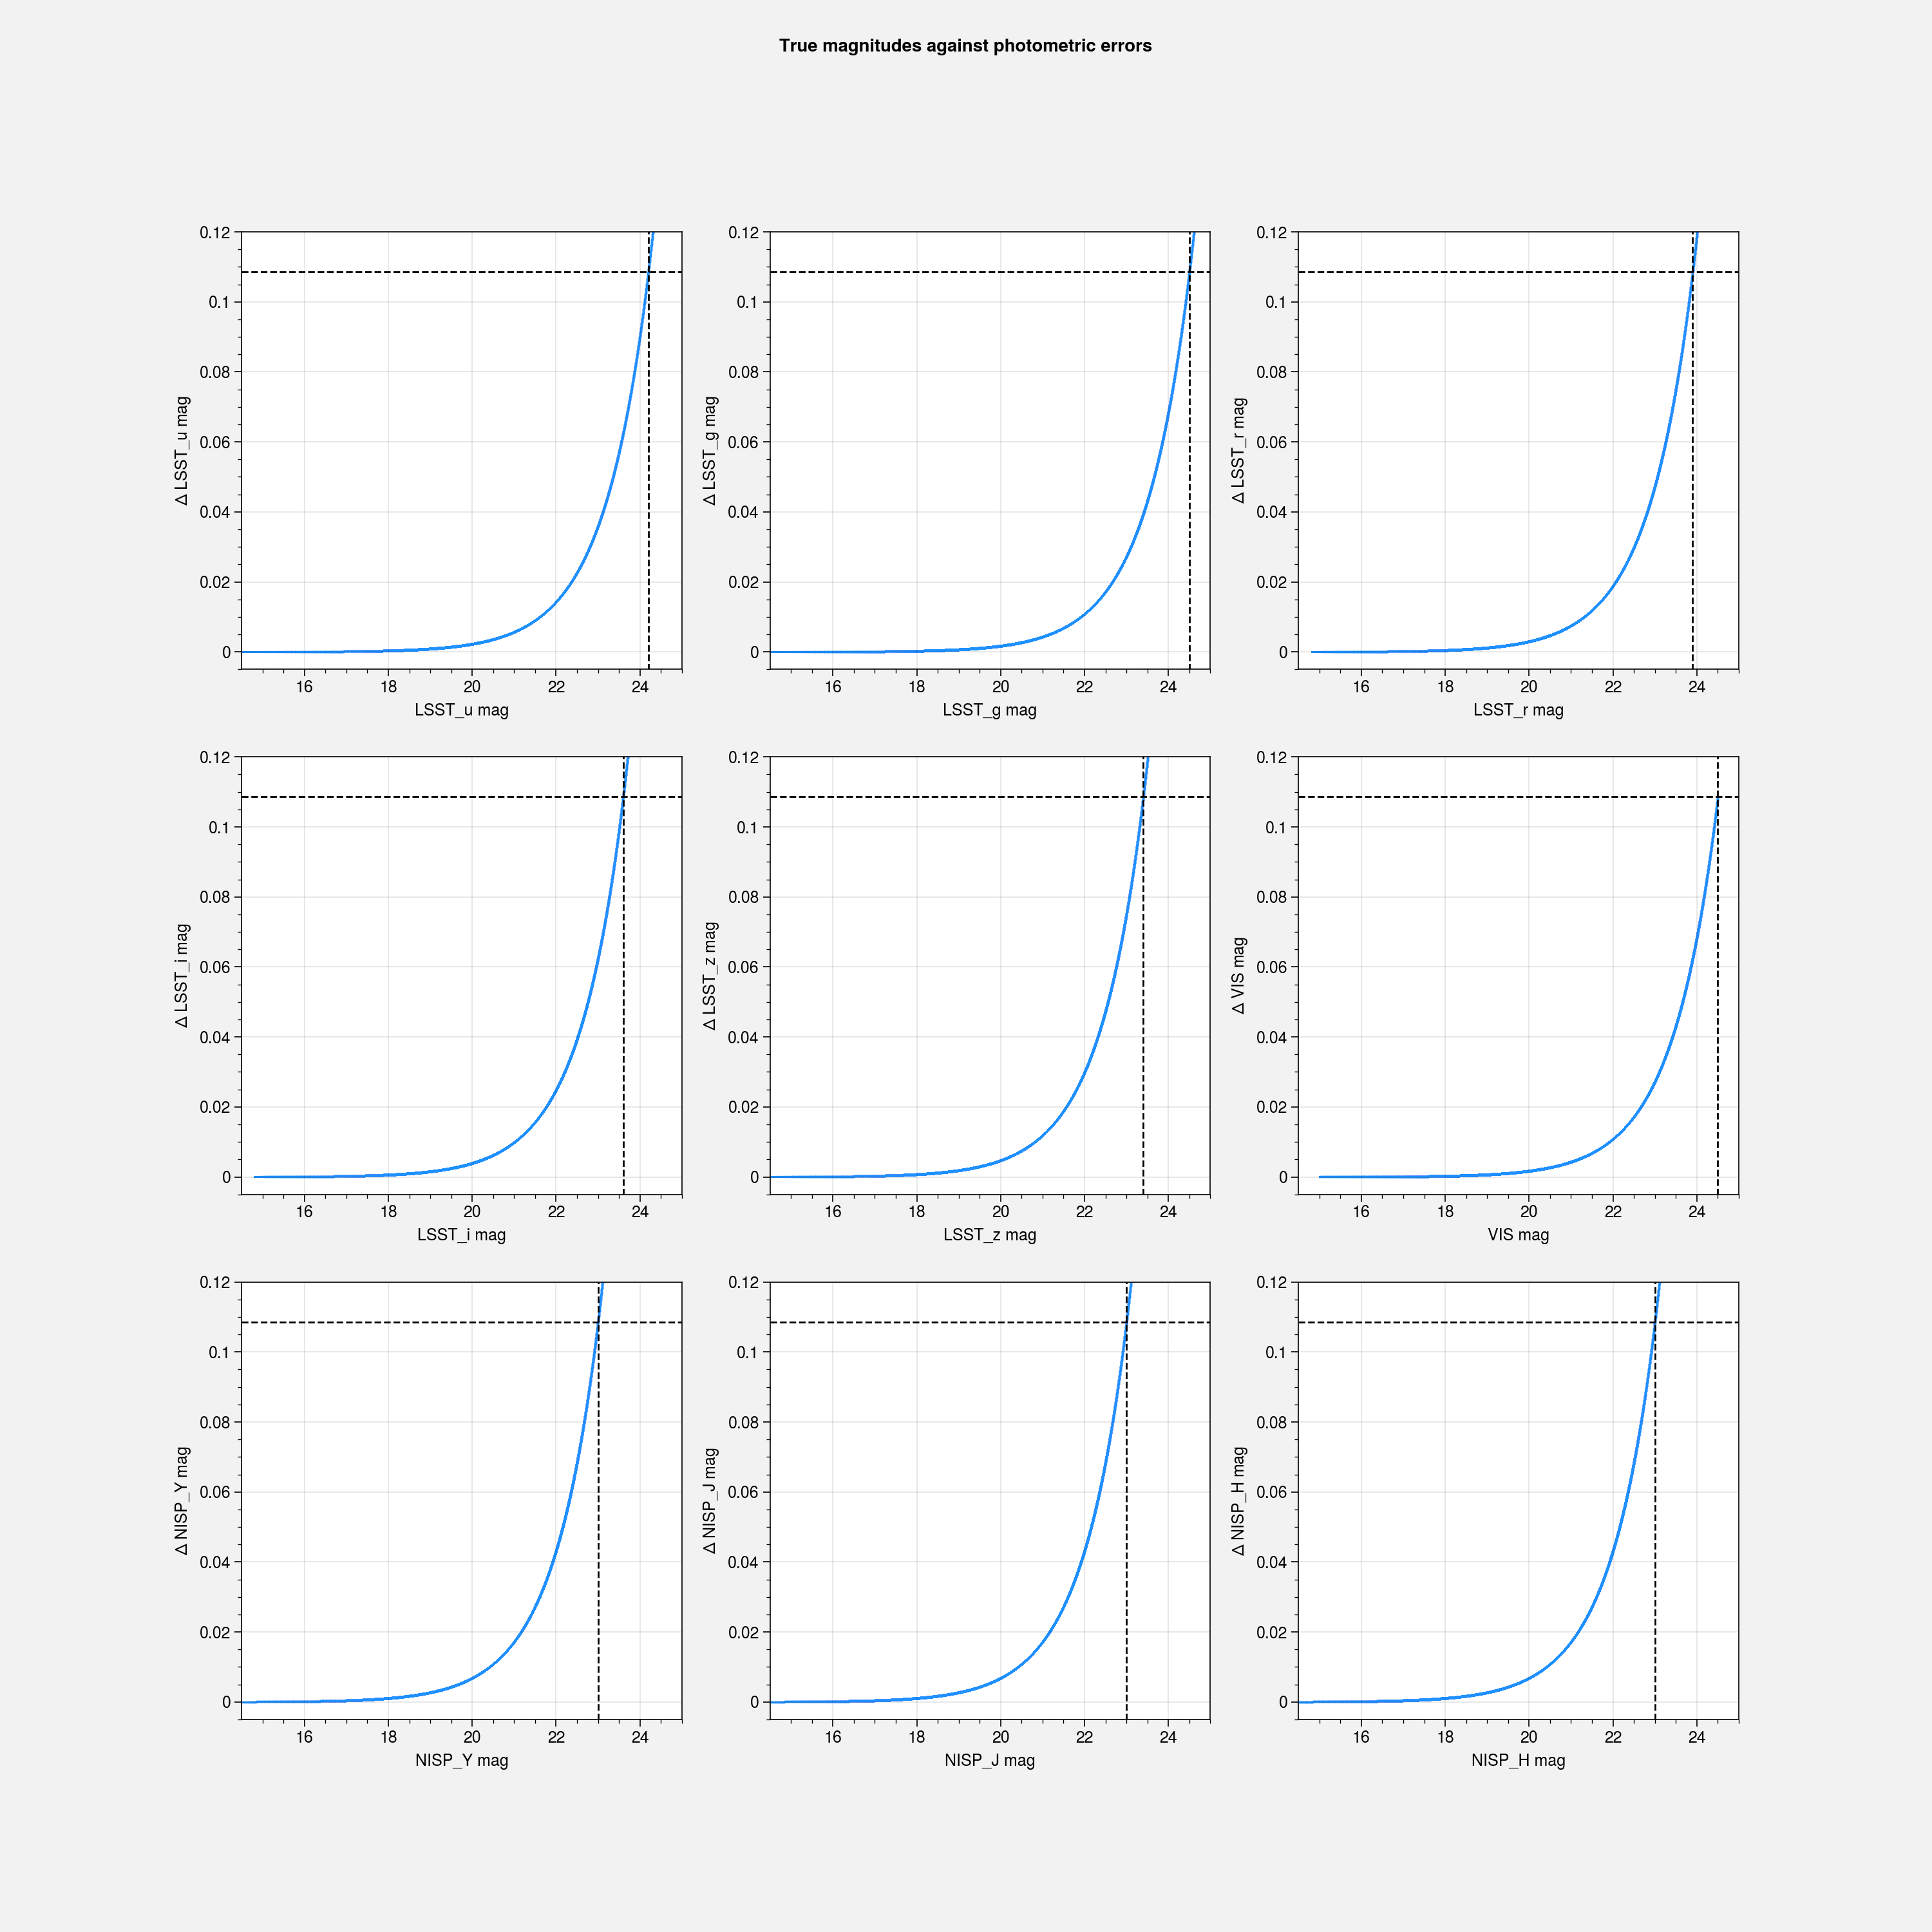

In [43]:
plt.figure(figsize=(15,15))
plt.suptitle('True magnitudes against photometric errors')
plt.subplot(331)
plt.scatter(observable_df['LSST_u'], phot_errors_df['delta_LSST_u'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_u'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_u mag')
plt.ylabel(r'$\Delta$ LSST_u mag')

plt.subplot(332)
plt.scatter(observable_df['LSST_g'], phot_errors_df['delta_LSST_g'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_g'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_g mag')
plt.ylabel(r'$\Delta$ LSST_g mag')

plt.subplot(333)
plt.scatter(observable_df['LSST_r'], phot_errors_df['delta_LSST_r'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_r'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_r mag')
plt.ylabel(r'$\Delta$ LSST_r mag')

plt.subplot(334)
plt.scatter(observable_df['LSST_i'], phot_errors_df['delta_LSST_i'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_i'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_i mag')
plt.ylabel(r'$\Delta$ LSST_i mag')

plt.subplot(335)
plt.scatter(observable_df['LSST_z'], phot_errors_df['delta_LSST_z'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_z'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_z mag')
plt.ylabel(r'$\Delta$ LSST_z mag')

plt.subplot(336)
plt.scatter(observable_df['VIS'], phot_errors_df['delta_VIS'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['VIS'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('VIS mag')
plt.ylabel(r'$\Delta$ VIS mag')

plt.subplot(337)
plt.scatter(observable_df['NISP_Y'], phot_errors_df['delta_NISP_Y'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_Y'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_Y mag')
plt.ylabel(r'$\Delta$ NISP_Y mag')

plt.subplot(338)
plt.scatter(observable_df['NISP_J'], phot_errors_df['delta_NISP_J'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_J'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_J mag')
plt.ylabel(r'$\Delta$ NISP_J mag')

plt.subplot(339)
plt.scatter(observable_df['NISP_H'], phot_errors_df['delta_NISP_H'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_H'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_H mag')
plt.ylabel(r'$\Delta$ NISP_H mag')

plt.show()
#plt.savefig('phot_errs_revised.png', format='png', dpi=250, facecolor='w')

In [44]:
ughhhh = observable_df['tau/Gyr'].value_counts()
ughhhh

1.0     61445
0.1     58945
3.0     55290
10.0    46544
Name: tau/Gyr, dtype: int64

In [45]:
taus = {'0.1 Gyr':ughhhh[0.1],
        '1 Gyr':ughhhh[1],
        '3 Gyr':ughhhh[3],
        '10 Gyr':ughhhh[10]}

In [46]:
tau_names=list(taus.keys())
tau_counts=list(taus.values())

In [47]:
zeds = observable_df['Z'].value_counts()
zeds

-0.3    85395
 0.3    80592
 0.0    56237
Name: Z, dtype: int64

In [48]:
Z_dict = {'-0.3' : zeds[-0.3],
          '0.0' : zeds[0.0],
          '0.3' : zeds[0.3]}

In [49]:
Z_names = list(Z_dict.keys())
Z_counts = list(Z_dict.values())

/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class w

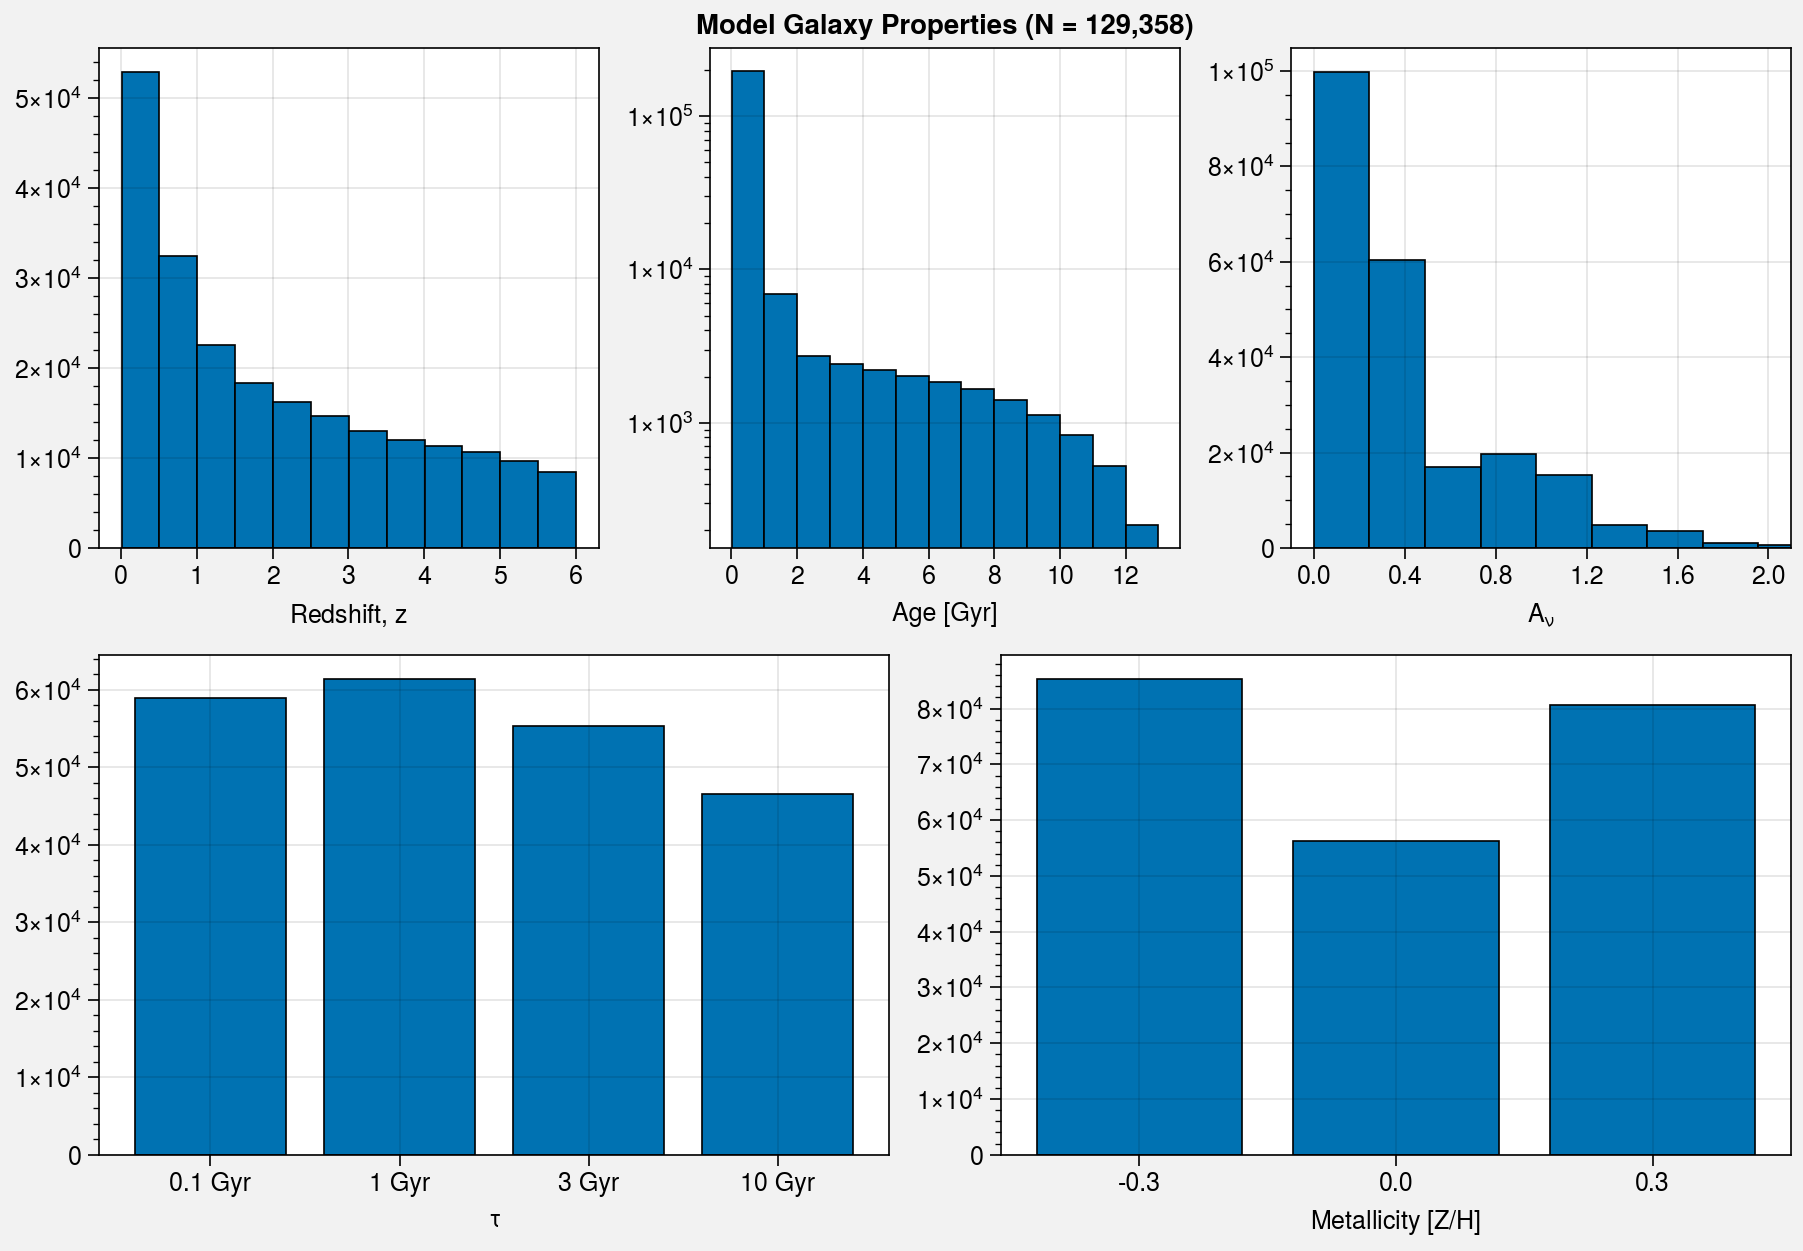

In [50]:
# Automatic spacing for all margins and between all columns and rows
fig, axs = plot.subplots([[1 , 1, 2, 2, 3, 3],[4, 4, 4, 5, 5, 5]], axwidth=2.5, share=0)

axs[0].hist(observable_df['z'], bins=12)
axs[0].format(xlabel=(r'Redshift, $z$'), xlocator=1, xformatter='scalar', yformatter='sci', ylocator=10e3)

axs[1].hist(observable_df['t/Gyr'], bins=13)
axs[1].format(xlabel=r'Age [Gyr]', xlocator=2, xformatter='scalar', yscale='log', yformatter='sci')

axs[2].hist(observable_df['Av'], bins=9)
axs[2].format(xlabel=(r'$A_{\nu}$'), xlocator=.4, xformatter='scalar', yformatter='sci', xlim=(-0.1, 2.1))

axs[3].bar(tau_names, tau_counts)
axs[3].format(xlabel=r'$\tau$', yformatter='sci', ylocator=10e3)

axs[4].bar(Z_names, Z_counts)
axs[4].format(xlabel=r'Metallicity $[Z/H]$', yformatter='sci', ylocator=10e3)

axs.format(suptitle='Model Galaxy Properties (N = 129,358)')

#plt.savefig('properties.png', format='png', dpi=250, facecolor='w')

### Make catalogues for each of the 4 filter setups.

In [51]:
sample_df = phot_errors_df.sample(6000, random_state=45).copy()

In [52]:
sample_df.to_csv('euc_obs_n6000.csv')

Text(0, 0.5, '$\\Delta$ NISP_H mag')

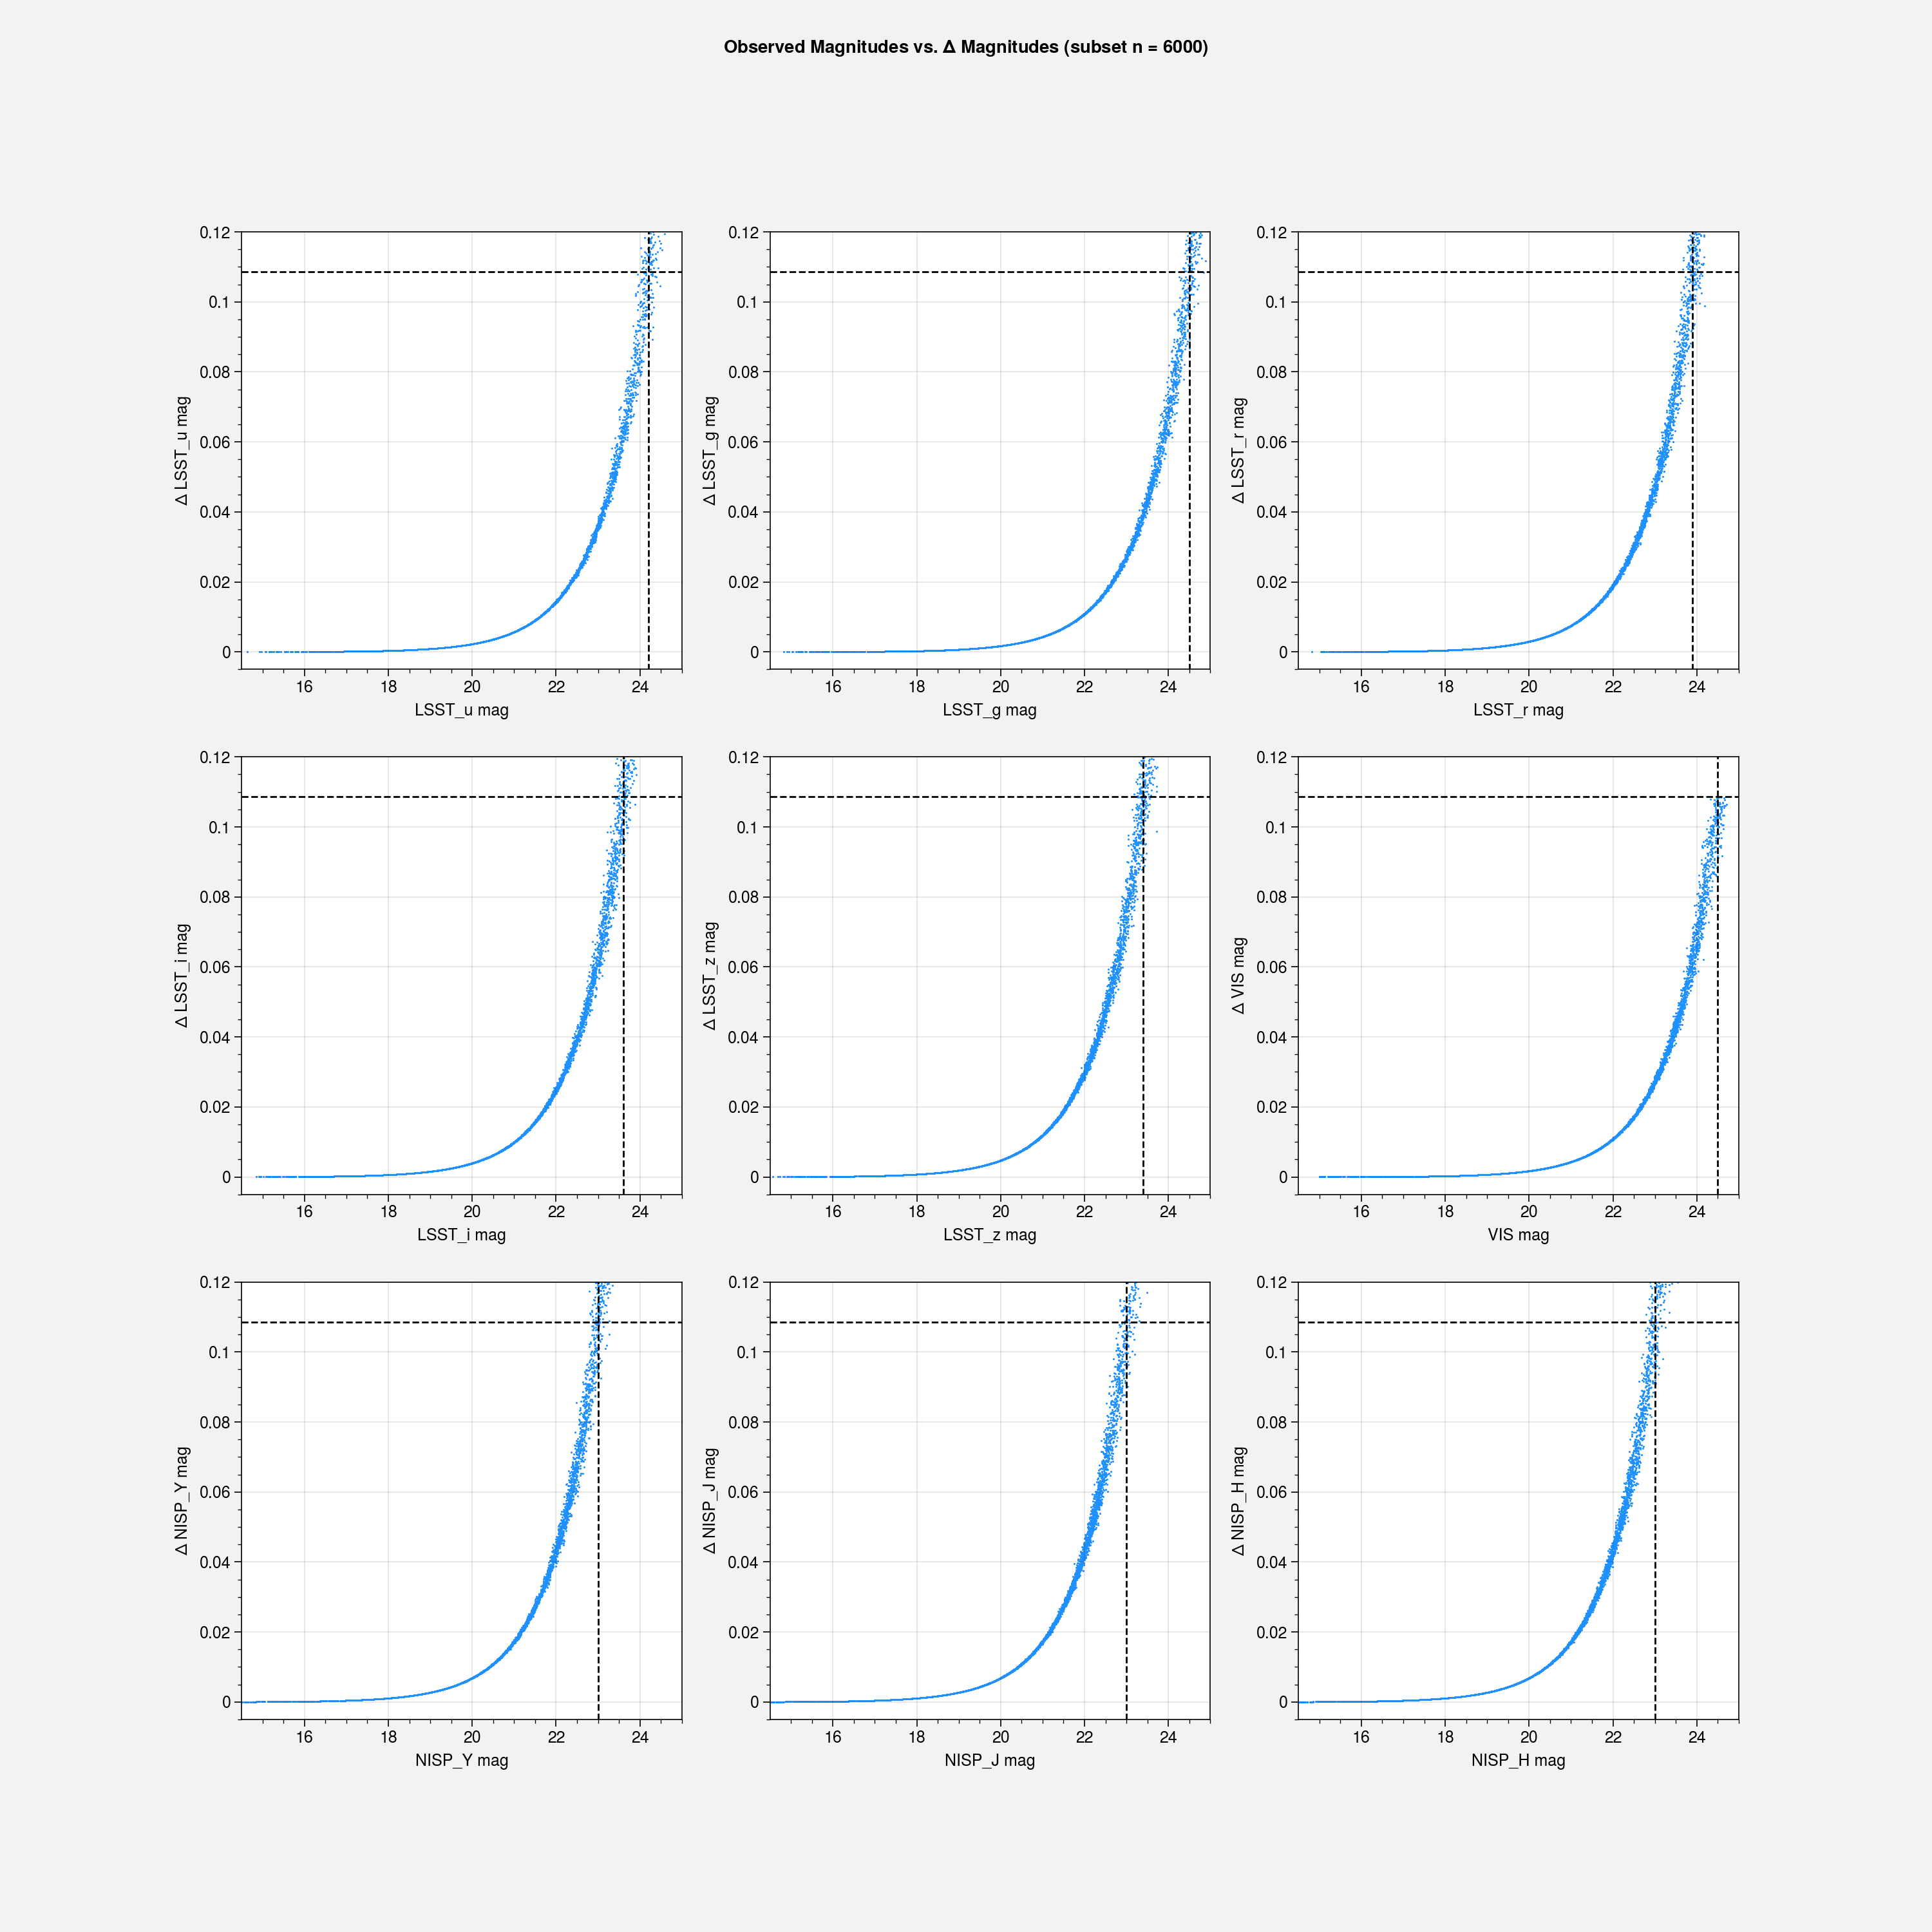

In [54]:
plt.figure(figsize=(15,15))
plt.suptitle('Observed Magnitudes vs. $\Delta$ Magnitudes (subset n = 6000)')
plt.subplot(331)
plt.scatter(sample_df['LSST_u_OBS'], sample_df['delta_LSST_u'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_u'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_u mag')
plt.ylabel(r'$\Delta$ LSST_u mag')

plt.subplot(332)
plt.scatter(sample_df['LSST_g_OBS'], sample_df['delta_LSST_g'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_g'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_g mag')
plt.ylabel(r'$\Delta$ LSST_g mag')

plt.subplot(333)
plt.scatter(sample_df['LSST_r_OBS'], sample_df['delta_LSST_r'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_r'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_r mag')
plt.ylabel(r'$\Delta$ LSST_r mag')

plt.subplot(334)
plt.scatter(sample_df['LSST_i_OBS'], sample_df['delta_LSST_i'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_i'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_i mag')
plt.ylabel(r'$\Delta$ LSST_i mag')

plt.subplot(335)
plt.scatter(sample_df['LSST_z_OBS'], sample_df['delta_LSST_z'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_z'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_z mag')
plt.ylabel(r'$\Delta$ LSST_z mag')

plt.subplot(336)
plt.scatter(sample_df['VIS_OBS'], sample_df['delta_VIS'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['VIS'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('VIS mag')
plt.ylabel(r'$\Delta$ VIS mag')

plt.subplot(337)
plt.scatter(sample_df['NISP_Y_OBS'], sample_df['delta_NISP_Y'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_Y'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_Y mag')
plt.ylabel(r'$\Delta$ NISP_Y mag')

plt.subplot(338)
plt.scatter(sample_df['NISP_J_OBS'], sample_df['delta_NISP_J'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_J'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_J mag')
plt.ylabel(r'$\Delta$ NISP_J mag')

plt.subplot(339)
plt.scatter(sample_df['NISP_H_OBS'], sample_df['delta_NISP_H'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_H'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_H mag')
plt.ylabel(r'$\Delta$ NISP_H mag')

#plt.savefig('sample_phot_errs_revised.png', format='png', dpi=250, facecolor='w')

In [55]:
sample_tau = sample_df['tau/Gyr'].value_counts()

In [56]:
sample_taus = {'0.1 Gyr':sample_tau[0.1],
        '1 Gyr':sample_tau[1],
        '3 Gyr':sample_tau[3],
        '10 Gyr':sample_tau[10]}

In [57]:
sample_tau_names=list(sample_taus.keys())
sample_tau_counts=list(sample_taus.values())

In [58]:
sample_zeds = sample_df['Z'].value_counts()


In [59]:
sample_Z_dict = {'-0.3' : sample_zeds[-0.3],
          '0.0' : sample_zeds[0.0],
          '0.3' : sample_zeds[0.3]}

In [60]:
sample_Z_names = list(sample_Z_dict.keys())
sample_Z_counts = list(sample_Z_dict.values())

/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class w

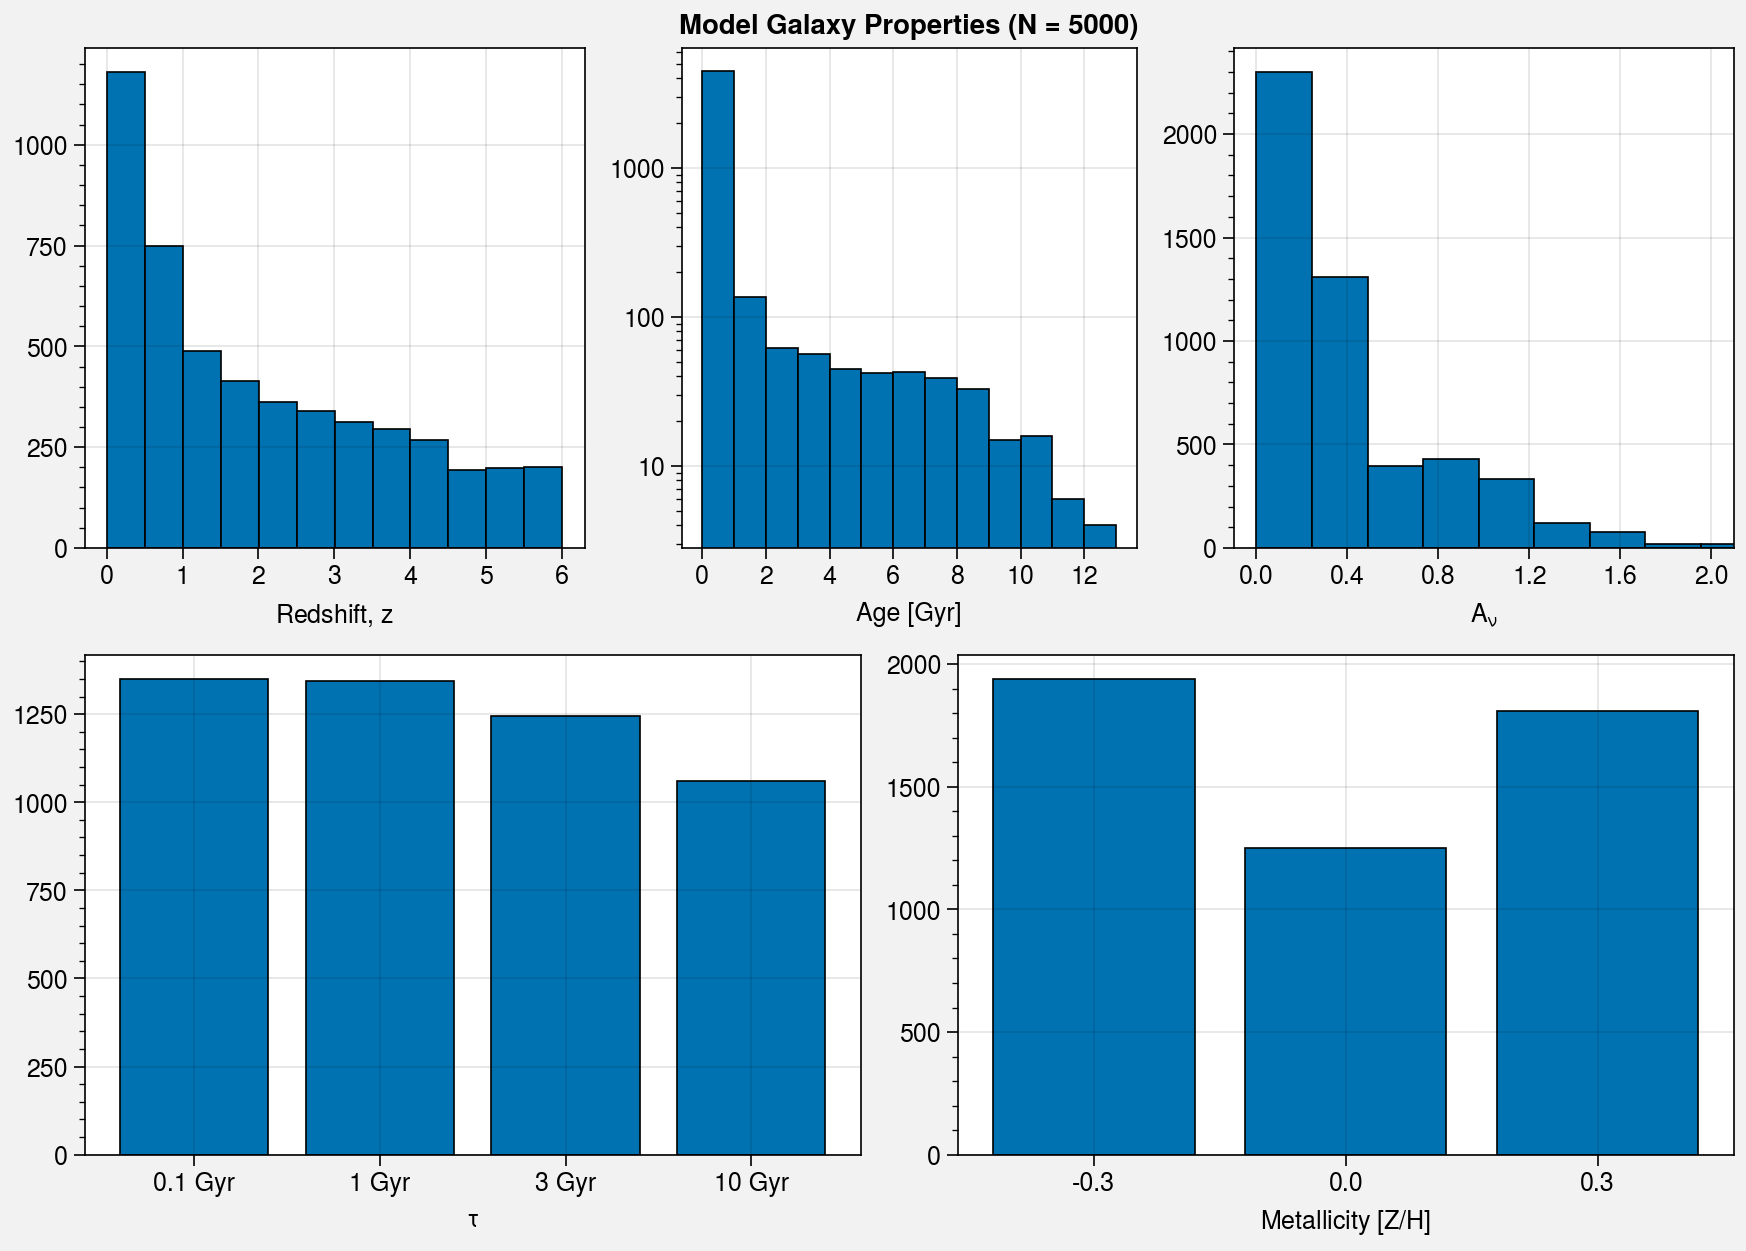

In [61]:
# Automatic spacing for all margins and between all columns and rows
fig, axs = plot.subplots([[1 , 1, 2, 2, 3, 3],[4, 4, 4, 5, 5, 5]], axwidth=2.5, share=0)

axs[0].hist(sample_df['z'], bins=12)
axs[0].format(xlabel=(r'Redshift, $z$'), xlocator=1, xformatter='scalar', yformatter='scalar', ylocator=250)

axs[1].hist(sample_df['t/Gyr'], bins=13)
axs[1].format(xlabel=r'Age [Gyr]', xlocator=2, xformatter='scalar', yscale='log', yformatter='scalar')

axs[2].hist(sample_df['Av'], bins=9)
axs[2].format(xlabel=(r'$A_{\nu}$'), xlocator=.4, xformatter='scalar', yformatter='scalar', xlim=(-0.1, 2.1), ylocator=500)

axs[3].bar(sample_tau_names, sample_tau_counts)
axs[3].format(xlabel=r'$\tau$', yformatter='scalar', ylocator=250)

axs[4].bar(sample_Z_names, sample_Z_counts)
axs[4].format(xlabel=r'Metallicity $[Z/H]$', yformatter='scalar', ylocator=500)

axs.format(suptitle='Model Galaxy Properties (N = 6000)')

#plt.savefig('sample_properties.png', format='png', dpi=250, facecolor='w')

In [62]:
sample_df.columns

Index(['For_key_ID', 'LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'VIS',
       'NISP_Y', 'NISP_J', 'NISP_H', 'z', 't/Gyr', 'M*', 'M_initial', 'Z',
       'SFH', 'tau/Gyr', 'Av_law', 'Av', 't_l', 'physical', 'FLUX_LSST_u',
       'FLUX_LSST_g', 'FLUX_LSST_r', 'FLUX_LSST_i', 'FLUX_LSST_z', 'FLUX_VIS',
       'FLUX_NISP_Y', 'FLUX_NISP_J', 'FLUX_NISP_H', 'FLUX_LSST_u_ERR',
       'FLUX_LSST_g_ERR', 'FLUX_LSST_r_ERR', 'FLUX_LSST_i_ERR',
       'FLUX_LSST_z_ERR', 'FLUX_VIS_ERR', 'FLUX_NISP_Y_ERR', 'FLUX_NISP_J_ERR',
       'FLUX_NISP_H_ERR', 'FLUX_LSST_u_OBS', 'FLUX_LSST_g_OBS',
       'FLUX_LSST_r_OBS', 'FLUX_LSST_i_OBS', 'FLUX_LSST_z_OBS', 'FLUX_VIS_OBS',
       'FLUX_NISP_Y_OBS', 'FLUX_NISP_J_OBS', 'FLUX_NISP_H_OBS', 'LSST_u_OBS',
       'delta_LSST_u', 'LSST_g_OBS', 'delta_LSST_g', 'LSST_r_OBS',
       'delta_LSST_r', 'LSST_i_OBS', 'delta_LSST_i', 'LSST_z_OBS',
       'delta_LSST_z', 'VIS_OBS', 'delta_VIS', 'NISP_Y_OBS', 'delta_NISP_Y',
       'NISP_J_OBS', 'delta_NISP_J', 'NISP_H_

In [63]:
full_filts = sample_df.drop(columns=['For_key_ID', 'z', 't/Gyr', 'M*', 'M_initial', 'Z',
       'SFH', 'tau/Gyr', 'Av_law', 'Av', 't_l', 'physical'])

In [64]:
full_filts['z'] = sample_df['z']

In [65]:
full_filts.insert(loc=0, column='ID', value=np.arange(1, len(full_filts)+1))

In [66]:
full_filts

,ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,...,delta_LSST_z,VIS_OBS,delta_VIS,NISP_Y_OBS,delta_NISP_Y,NISP_J_OBS,delta_NISP_J,NISP_H_OBS,delta_NISP_H,z
131665,1,21.3223,20.0209,20.0931,20.1325,20.1817,20.1110,20.3711,20.6212,20.7357,...,0.005603,20.113507,0.001906,20.359116,0.009642,20.641954,0.012140,20.717828,0.013490,3.19
222620,2,20.9868,21.1172,21.2163,20.9152,20.6820,21.0112,20.6792,20.6594,20.5927,...,0.008882,21.011264,0.004367,20.690816,0.012806,20.666343,0.012574,20.576141,0.011825,0.95
166174,3,23.7335,21.9347,21.8467,21.8697,21.9117,21.8592,22.0265,22.1687,21.9625,...,0.027568,21.853564,0.009537,22.028757,0.044292,22.196847,0.050490,21.940495,0.041757,3.25
64327,4,26.5780,24.5708,24.1795,24.0641,23.9999,24.1105,23.9898,23.9150,23.3388,...,0.188662,24.215462,0.075845,23.826530,0.270174,24.129678,0.252188,23.324924,0.148335,3.20
195261,5,19.5484,19.6484,19.8318,19.9985,20.0353,19.9109,20.2372,20.5093,20.8513,...,0.004896,19.912053,0.001585,20.244034,0.008523,20.511319,0.010951,20.834391,0.015005,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148581,4996,23.8955,23.7044,23.5963,23.5250,23.4743,23.5518,22.9091,22.7105,22.5031,...,0.116264,23.525440,0.045336,22.894740,0.099854,22.727908,0.083162,22.481366,0.068701,1.57
101885,4997,27.8323,26.6404,25.0606,24.0015,23.2541,24.2096,22.6892,22.2712,21.8992,...,0.094921,24.212269,0.083093,22.674785,0.081546,22.266832,0.055489,21.901812,0.039392,0.93
205721,4998,22.9256,22.1397,21.1946,20.7553,20.4981,20.9123,20.1277,19.8370,19.5723,...,0.007498,20.910877,0.003987,20.130896,0.007706,19.844857,0.005896,19.570704,0.004620,0.30
218966,4999,17.0604,17.2634,17.1380,17.2330,17.2777,17.1904,17.3092,17.2665,17.3095,...,0.000386,17.190102,0.000129,17.309417,0.000575,17.265531,0.000552,17.309428,0.000575,0.41


In [ ]:
np.savetxt(r'all_5000.cat', full_filts.values, fmt=' '.join(['%i'] + ['%1.4f']*19))

In [ ]:
no_u_cat = full_filts.drop(columns=['LSST_u_OBS', 'delta_LSST_u'])

In [ ]:
np.savetxt(r'no_u_5000.cat', no_u_cat.values, fmt=' '.join(['%i'] + ['%1.4f']*17))

In [ ]:
gnd_cat = full_filts.drop(columns=['VIS_OBS',
       'NISP_Y_OBS', 'NISP_J_OBS', 'NISP_H_OBS','delta_VIS', 'delta_NISP_Y', 'delta_NISP_J', 'delta_NISP_H'])

In [ ]:
np.savetxt(r'gnd_5000.cat', gnd_cat.values, fmt=' '.join(['%i'] + ['%1.4f']*11))

In [ ]:
euc_cat = full_filts.drop(columns=['LSST_u_OBS', 'LSST_g_OBS', 'LSST_r_OBS', 'LSST_i_OBS', 'LSST_z_OBS', 'delta_LSST_u',
       'delta_LSST_g', 'delta_LSST_r', 'delta_LSST_i', 'delta_LSST_z'])

In [ ]:
np.savetxt(r'euc_5000.cat', euc_cat.values, fmt=' '.join(['%i'] + ['%1.4f']*9))